In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

/var/folders/c3/p91b9pws2zxg_qh6gn4nv4pc0000gn/T/ipykernel_57603/2299972107.py:21: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.dates.AutoDateLocator'>
  plt.locator_params(axis='x', nbins=10)


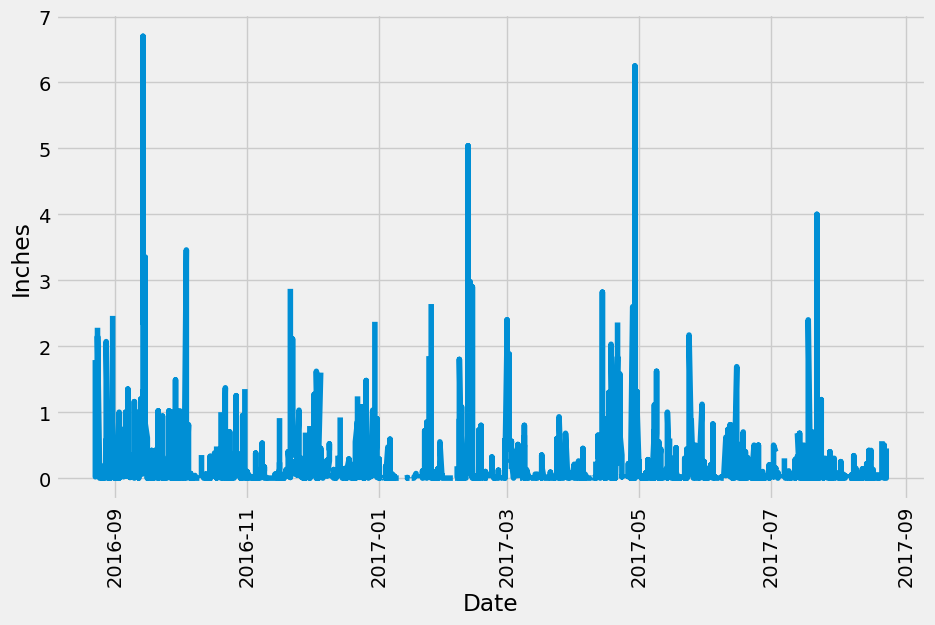

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, measurement.prcp]
one_year = session.query(*sel).filter(measurement.date <= '2017-08-23', measurement.date >= '2016-08-23')

# Save the query results as a Pandas DataFrame. Explicitly set the column names
one_year_df = pd.DataFrame(one_year, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
one_year_sorted = one_year_df.sort_values(['Date'])
one_year_sorted["Date"] = pd.to_datetime(one_year_sorted["Date"])

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=[10,6])
plt.plot(one_year_sorted.Date, one_year_sorted.Precipitation)
plt.locator_params(axis='x', nbins=10)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
one_year_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
number_of_stations = session.query(station.station).count()
number_of_stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = [measurement.station,
                       func.min(measurement.tobs),
                       func.max(measurement.tobs),
                       func.avg(measurement.tobs)]
most_active_stats = session.query(*most_active_station).filter(measurement.station == "USC00519281").all()
most_active_stats

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

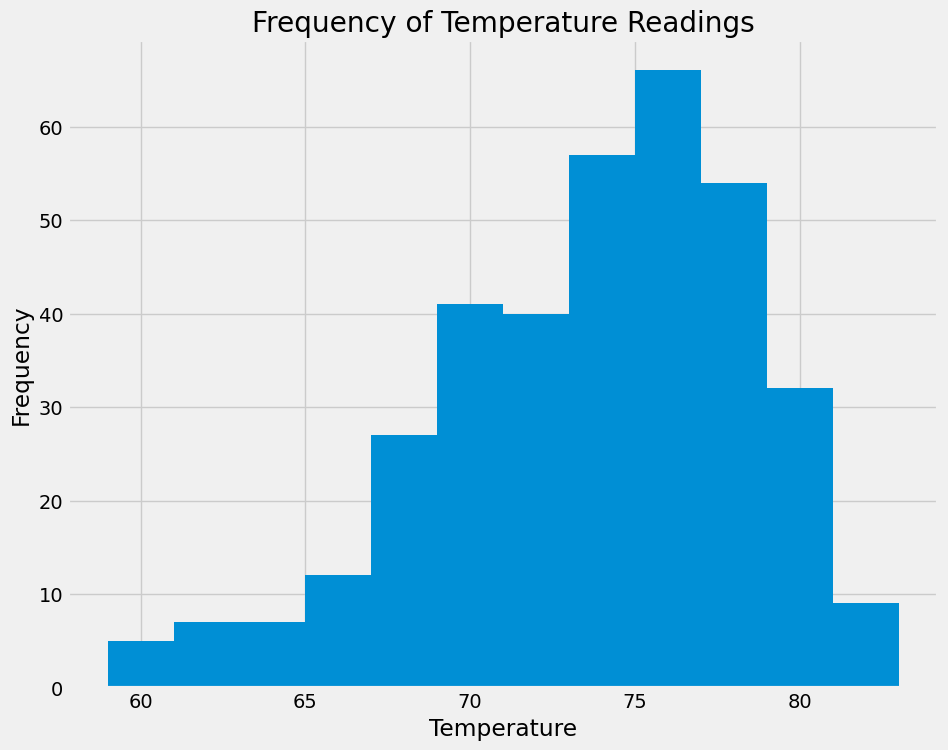

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
latest_date = session.query(measurement.date).order_by(measurement.date.desc()).filter(measurement.station == "USC00519281").first()
dt.date(2017, 8, 18) - dt.timedelta(days=365)
results = session.query(measurement.tobs).filter(measurement.date <= '2017-08-18', measurement.date >= '2016-08-18').filter(measurement.station == 'USC00519281').all()
results_df = pd.DataFrame(results)
results_df.hist(figsize=[10, 8], bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.title('Frequency of Temperature Readings')
plt.show()


# Close Session

In [16]:
# Close Session
session.close()